# Introduction 


* The code below will analyze an IBM attrition dataset. The dataset consists of employee statistics such as performance and attrition. It also includes data on other features of that employee such as hourly rate, commute time, job satisfaction, etc. This code will visualize the data, and than create a logistical regression classifier to predict employee performance and attrition based on the feature data provided. 


# Loading and Installing Modules

* The code below indicates all the libraries and modules needed to perform all tasks needed to fullfil the objectives of this project
* Some libraries are dependent of the version of python and tensorflow running in the machine


In [1]:
#import sys
#!{sys.executable} -m pip install statsmodels
#!{sys.executable} -m pip install seaborn==0.11.0
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install keras

In [2]:
#Load Libraries

import os
import sys
import matplotlib.pyplot as plt 
import pandas as pd  
#plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
# pd.set_option("display.max_columns", None, "display.max_rows", None)
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
import tensorflow as tf
from imblearn.over_sampling import SMOTE

# 1. Load Data
## 1.1 Read Data

* The data used for this project will be saved on the same folder and the code below will read this file and show the first 5 rows.
* Knowing the different column types we are dealing with, makes it possible to explore, vizualize and closely study the data.

In [3]:
path = os.getcwd()
dataset_path = os.path.join(path,'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(dataset_path) #read data set

In [4]:
df.head() #print first 5 rows 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 1.2 Cleaning and Organizing Data
* Data cleaning is imperative to obtain the most accurate classifiers. As we can see above, the EmployeeCount is '1' in all rows, Over18 is always 'Y' and StandardHours is always '80' - therefore these columns were deleted.
* Null values are also being checked to make sure there is none.

In [6]:
df = df.drop(["EmployeeCount","Over18","StandardHours"], axis=1) #Drop columns with useless data
NV = df.isnull().sum().sum() #Check Null Values in Entire Dataframe
print("The number of Null Values in Entire Dataframe: ", NV)

The number of Null Values in Entire Dataframe:  0


## 2. Data Exploration & Visualization

### 2.1 General Overview of Dataset

* An overview of the data is shown below. This includes useful information such as data types of each column and index range of the data.
* The length of the data is also shown as well as some statistical data such as percentiles, mean and std of the numerical values using the describe() method.

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [8]:
len(df) #number of datapoints in df

1470

In [9]:
df.describe() #high level statistics of df

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2.2 Explore and Visualize Data

* Explore and visualize data, especially fields that intuitively could have a relation to Attrition & Performance. This includes features such as:

* Employee Overtime
* Department
* Job Role
* Years at Company
* Years since last promotion
* Education field
* Business Travel

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [13]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [14]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [15]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [16]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [18]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

# Employee Education

* The pie graph shown below gives a detailed vizualisation of Employee distribution based on their education fields.
* As we can see the most significant amount of employees are in the fields of Life Sciences and Medical whereas Human Resources has the least.

Text(0.5, 1.0, 'Employee Amount by Education Fields')

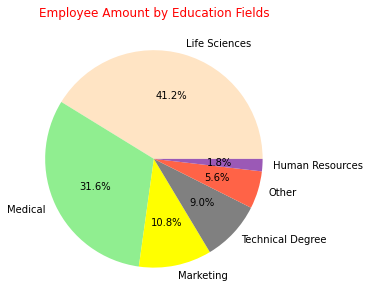

In [19]:
labels=df.EducationField.value_counts().index
colors=["bisque","lightgreen","yellow","gray","tomato","#9b59b6"]
sizes=df.EducationField.value_counts().values
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Employee Amount by Education Fields",color="red",fontsize=12)

# Do employees hate traveling?
* The pie charts below show the how travel frequency influences attrition. 
* The pie chart on the left indicates that only 8.0% of all employees not traveling want to leave.
* In the one on the right we can see a slight increase to 15.0% of those traveling rarely.
* The attrition rate for employees that travel frequently increases to 24.9% as shown in the middle graph.

Text(0.5, 1.0, 'Level of Attrition by Travel Frequency')

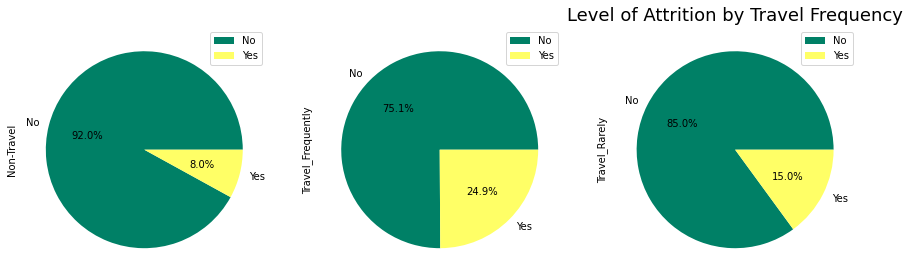

In [20]:
labels2=df.Attrition.value_counts().index

ax2 = df.groupby(['Attrition','BusinessTravel']).size().unstack().plot(kind='pie',figsize=(15,5), 
                            colormap= 'summer', subplots=True, labels=labels2, autopct="%1.1f%%" )
plt.title("Level of Attrition by Travel Frequency",color="black",fontsize=18)

#Employees traveling more tend to leave more

# Employee Burnout
* This section below will look at how overtime affects both performance and attrition
* No huge impact of overtime on performance rating 
* Overtime has a huge affect on attrition, bumping attrition from 10.4% to 30.5% 

Text(0.5, 1.0, 'Performance Rating by OverTime')

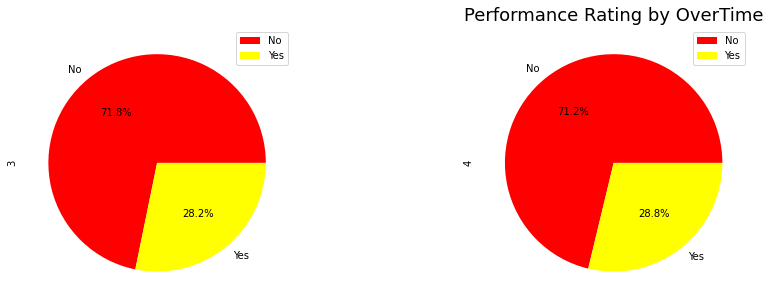

In [21]:
#looks at rate of attrition employees based on overtime or not 
labels2=df.OverTime.value_counts().index
ax2 = df.groupby(['OverTime','PerformanceRating']).size().unstack().plot(kind='pie',figsize=(15,5), 
                            colormap= 'autumn', subplots=True, labels=labels2, autopct="%1.1f%%" )
plt.title("Performance Rating by OverTime",color="black",fontsize=18)

Text(0.5, 1.0, 'Level of Attrition by OverTime or Not')

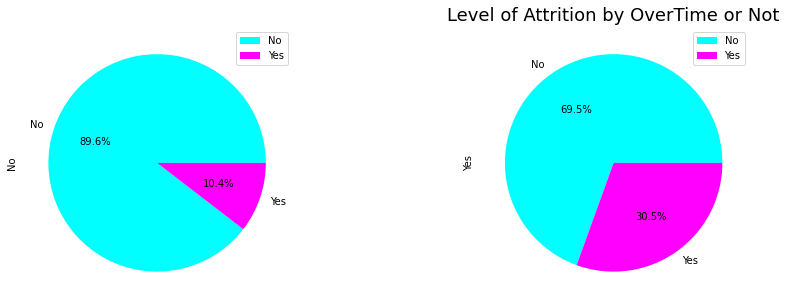

In [22]:
#looks at rate of attrition employees based on overtime or not 
labels2=df.Attrition.value_counts().index
ax2 = df.groupby(['Attrition','OverTime']).size().unstack().plot(kind='pie',figsize=(15,5), 
                            colormap= 'cool', subplots=True, labels=labels2, autopct="%1.1f%%" )
plt.title("Level of Attrition by OverTime or Not",color="black",fontsize=18)

# Earning less, leaving more
* The graph below shows two violine plots side by side depending on employees performance. The dark green means that employees are not leaving.
* Employees with a 3-point performance shown on the left. We can see the ones on earning less tend to leave more than the upper section where the ones earning more and with the same performance rating leave less.
* Employees with a 4-point performance and higher income tend to not think about leaving at all, while the ones with less income leave significantly more.

Text(0.5, 1.0, 'Income and its impact on Attrition')

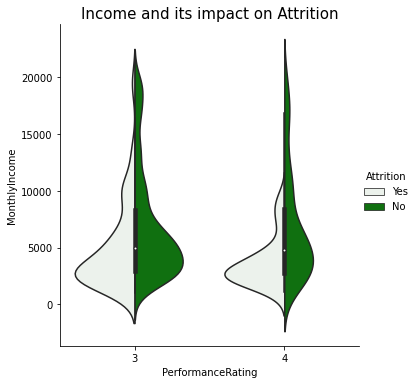

In [23]:
sns.catplot(data=df, kind="violin", x='PerformanceRating', y='MonthlyIncome', hue='Attrition',
            split=True, color= 'green', figsize=(8,8))
plt.title('Income and its impact on Attrition', fontsize=15)

* A higher percentary salary hike tend to keep more employees in as shown in the plot below 

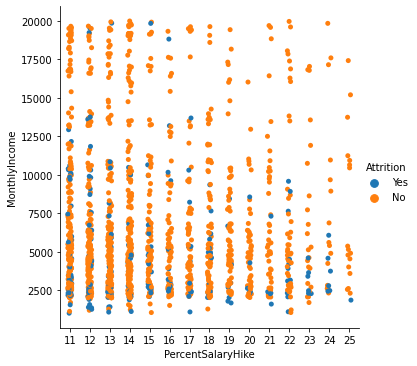

In [24]:
sns.catplot(data=df, x='PercentSalaryHike', y='MonthlyIncome', hue='Attrition') 

# Education level matters
* Below we relabeled the variable 'Education' to 'Education Level' - highlighting the education level categorically rather than numerically. This variable is imperative to understand how employees are being paid depending on their education and how this affects attrition

In [25]:
# Give names for the different education levels.
df['Education_Level'] = df['Education'].map({1:"Highschool", 2 : "Bachelors", 3: "Masters", 4:"Phd D."})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education_Level
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,Bachelors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,Highschool
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,Bachelors
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,Phd D.
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,Highschool


* The barplot below demonstrates how the employees are paid deprending on their education level.
* We can see than the higher the education the more they are being paid which is expected.

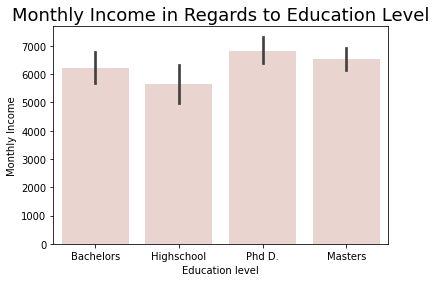

In [26]:
ax7=sns.barplot(x=df.Education_Level,y=df.MonthlyIncome,palette = sns.cubehelix_palette(len(df.index)))
plt.xlabel("Education level")
plt.ylabel("Monthly Income")
plt.title("Monthly Income in Regards to Education Level", color="black",fontsize=18)
plt.show()

* The barplot below illustrates how the Education level affects Performance

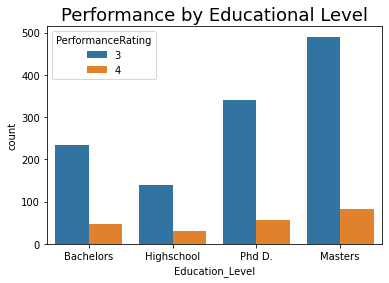

In [27]:
ax = sns.countplot(x="Education_Level", data=df, hue= "PerformanceRating")
plt.title("Performance by Educational Level",color="black",fontsize=18)
plt.show()

# Do they still want to leave?
* We can assume that they are being paid fairly and as expected because of their education
* The graph below shows that employees with a bachelors degree tend to leave more regardless

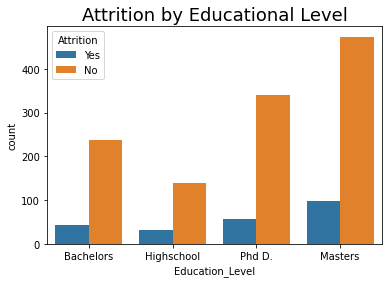

In [28]:
ax10 = sns.countplot(x="Education_Level", data=df, hue= "Attrition")
plt.title("Attrition by Educational Level",color="black",fontsize=18)
plt.show()

* The graph below shows attrition by job role in the company
* Is attrition influences by job roles? Perhaps the department managment incluences these decisions?

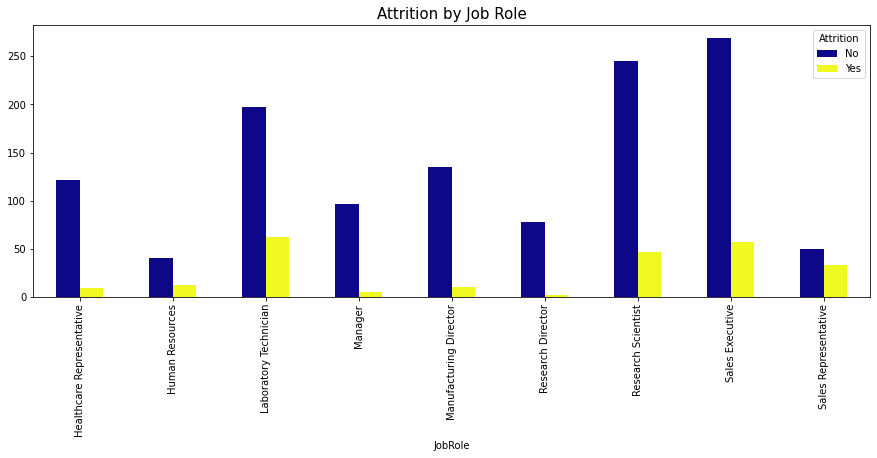

In [29]:
ax2 = df.groupby(['JobRole','Attrition']).size().unstack().plot(kind='bar',figsize=(15,5), colormap= 'plasma')
plt.title("Attrition by Job Role",color="black",fontsize=15)
plt.show()

### Attrition analysis by department: Distribution of Years at company

* The graphs below show how attrition is infuenced by:
* Years at the company
* Years since last promotion


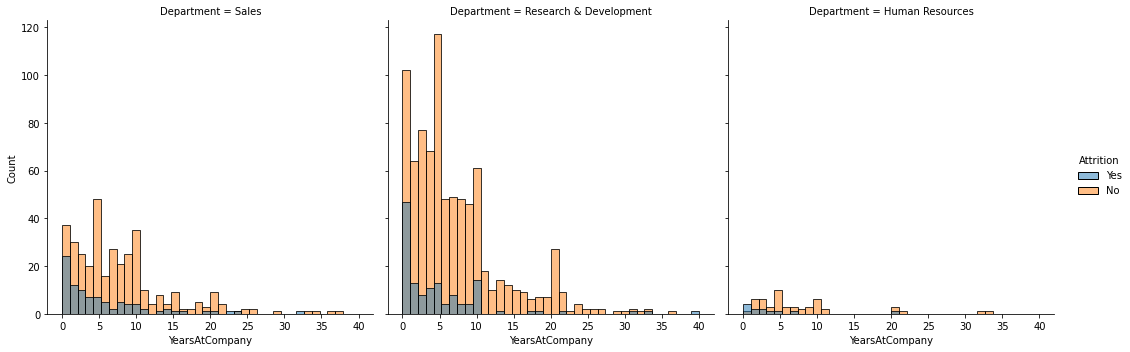

In [30]:
ax = sns.displot(data = df, x = 'YearsAtCompany', col='Department', hue='Attrition')

### Attrition analysis by department: Distribution of Years since last promotion

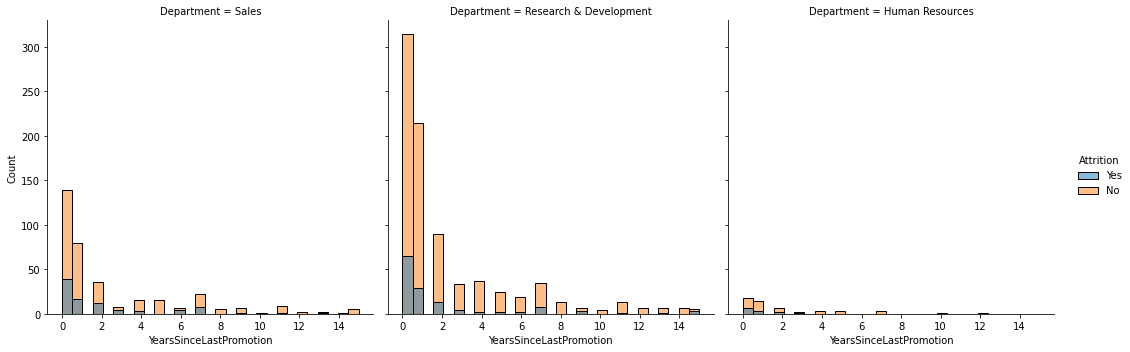

In [31]:
ax = sns.displot(data = df, x = 'YearsSinceLastPromotion', col='Department', hue='Attrition')

### Attrition analysis by Job satisfaction: Distribution of Monthly Income

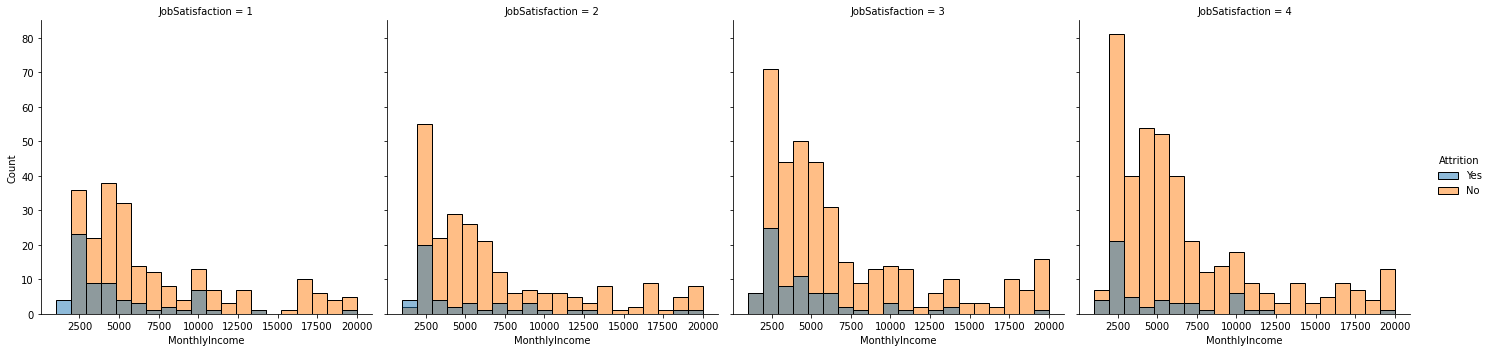

In [32]:
ax2 = sns.displot(data=df, x='MonthlyIncome', col='JobSatisfaction', hue='Attrition')

# 3.0 Statistical Testing of Feature Importance

* The following will conduct statisitcal test in an effort to perform feature engineering to see which features have the biggest impact of performance and attrition. This will help us simplify our dataset to construct classifiers. 

In [33]:
df = df.drop(['Education_Level'], axis=1)
# Transforming dataframe for statistical testing. First values are dropped to avoid dummy variable trap.
df_dummies = pd.get_dummies(df, columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','PerformanceRating'],drop_first=True)
df_dummies

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,1,0,0,1,1,0
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,1,0
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,0,0,0,0,0,0,1,0,0,0
1466,39,613,6,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,1,0,0,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,1,0,0,0,0,1,0,1,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,0,0,0,1,0,1,0,0,0


## 3.1 Feature Importance on Performance
* This method will use feature importance to select the top features that affect performance based on the extra tree classifier model

Age                                  0.039204
DailyRate                            0.038306
DistanceFromHome                     0.039481
Education                            0.037938
EnvironmentSatisfaction              0.034417
HourlyRate                           0.038082
JobInvolvement                       0.030793
JobLevel                             0.024572
JobSatisfaction                      0.032499
MonthlyIncome                        0.037649
MonthlyRate                          0.038910
NumCompaniesWorked                   0.034138
RelationshipSatisfaction             0.031365
StockOptionLevel                     0.026530
TotalWorkingYears                    0.034948
TrainingTimesLastYear                0.036981
WorkLifeBalance                      0.029618
YearsAtCompany                       0.032911
YearsInCurrentRole                   0.035082
YearsSinceLastPromotion              0.033547
YearsWithCurrManager                 0.035044
Attrition_Yes                     

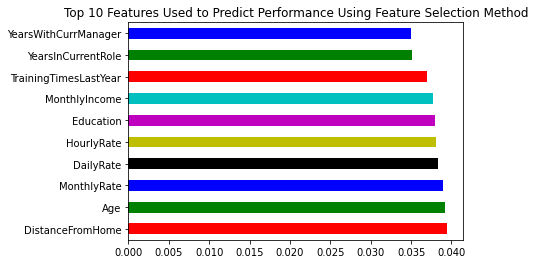

In [34]:
#VERY IMPORTANT NOTE: PercentSalaryHike was dropped from the performance dataset, primarily because 
# practically PercentSalaryHike is determined by PerformanceRating. Can not use that to predict PerformanceRating. 

X = df_dummies.drop(["PercentSalaryHike","PerformanceRating_4","EmployeeNumber"], axis = 1) #Independent Columns
y = df_dummies['PerformanceRating_4'] #Target Column i.e Performance

model = ExtraTreesClassifier() #model to be used for feature importance
model.fit(X,y) #fit data to model

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances) #prints results of feature importance model 

#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh',color = list('rgbkymc')) #plot top 10 feature
plt.title("Top 10 Features Used to Predict Performance Using Feature Selection Method")
plt.show()


## 3.2 Features Importance on Attrition
* This method will use feaure importance to select the top features that affect attrition based on the extra tree classifier model

Age                                  0.037821
DailyRate                            0.030379
DistanceFromHome                     0.034143
Education                            0.026401
EnvironmentSatisfaction              0.033032
HourlyRate                           0.028873
JobInvolvement                       0.029742
JobLevel                             0.028202
JobSatisfaction                      0.033439
MonthlyIncome                        0.035556
MonthlyRate                          0.026870
NumCompaniesWorked                   0.032157
PercentSalaryHike                    0.027871
RelationshipSatisfaction             0.029695
StockOptionLevel                     0.027618
TotalWorkingYears                    0.037568
TrainingTimesLastYear                0.026886
WorkLifeBalance                      0.030205
YearsAtCompany                       0.031269
YearsInCurrentRole                   0.028759
YearsSinceLastPromotion              0.027930
YearsWithCurrManager              

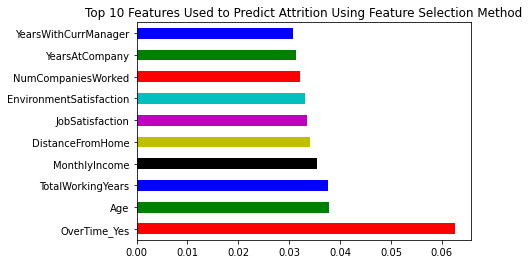

In [35]:
X = df_dummies.drop(["Attrition_Yes","EmployeeNumber"], axis = 1) #Independent Columns
y = df_dummies['Attrition_Yes'] #Target Column i.e Attrition

model = ExtraTreesClassifier() #model to be used for feature importance
model.fit(X,y) #fit data to model

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances) #prints results of feature importance model 

#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh', color = list('rgbkymc')) #Plot top 10 features
plt.title("Top 10 Features Used to Predict Attrition Using Feature Selection Method")
plt.show()

## 3.3 Heat Correlation Map

* Creates a heat map showing the correlation between all the variables
* This is used to further show which features have the biggest impact on attrition and performance

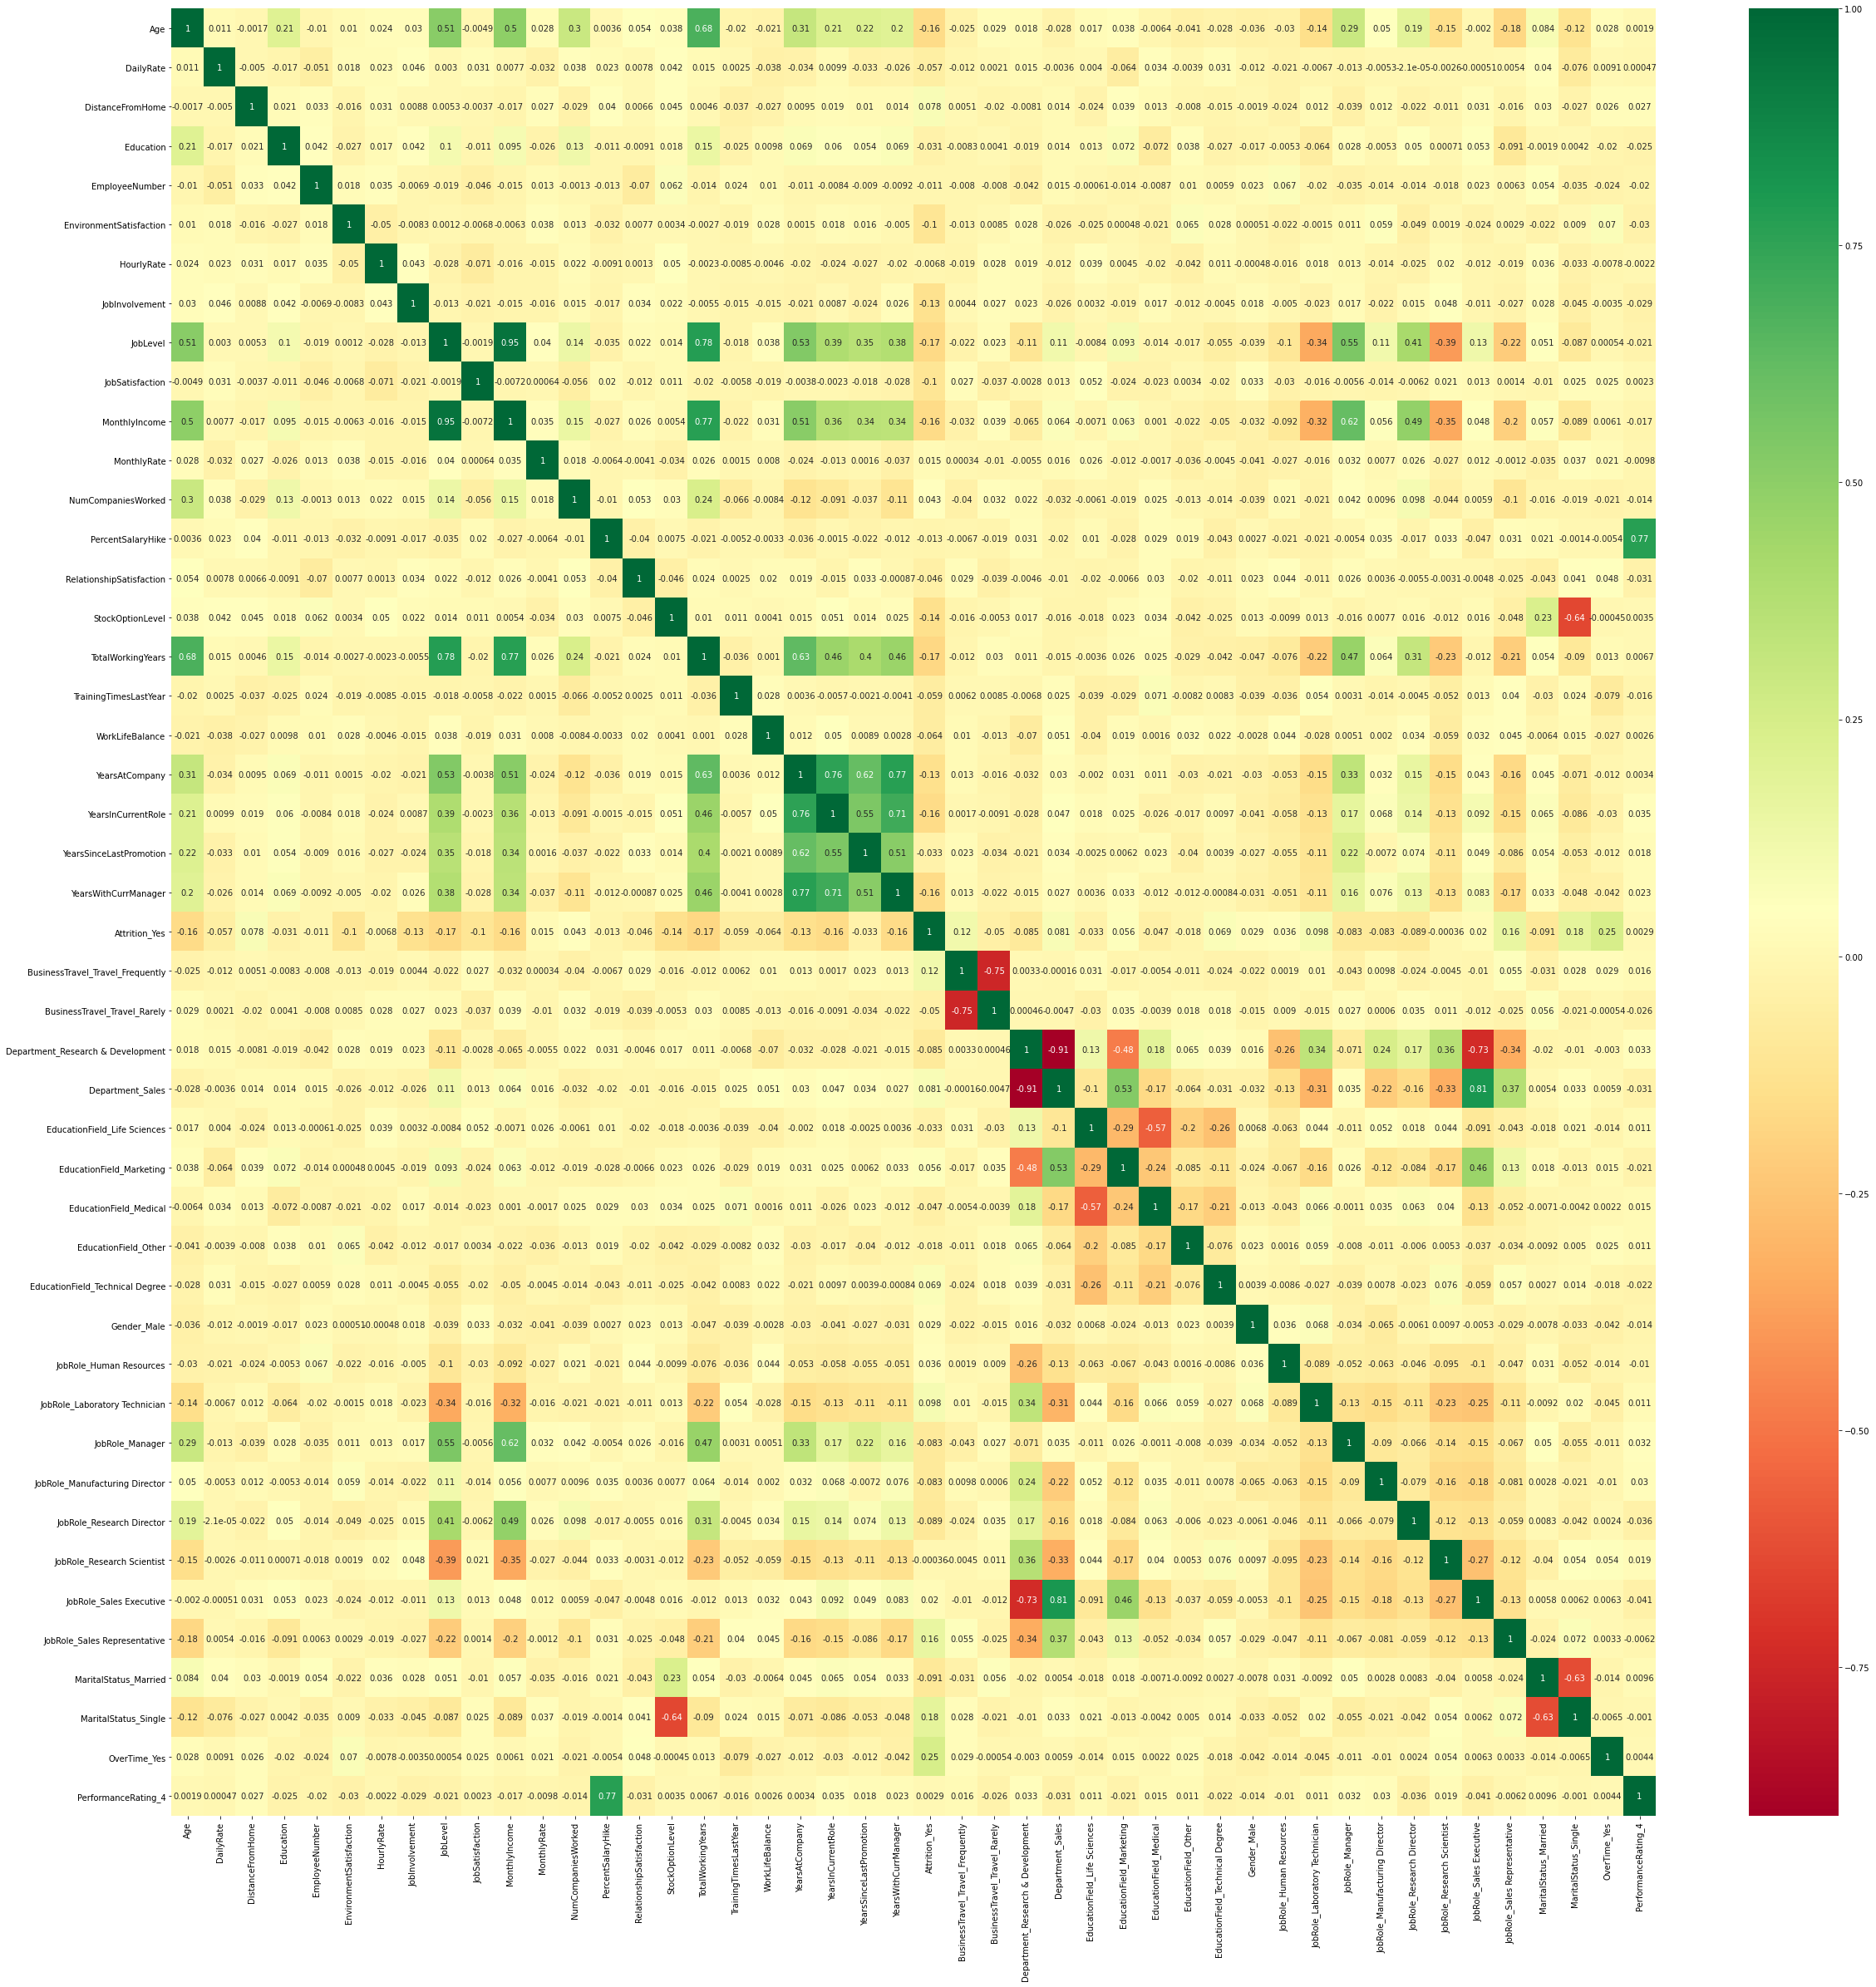

In [36]:
corrmat = df_dummies.corr()
top_corr_features = corrmat.index #get correlations of each features in dataset
plt.figure(figsize=(40,40))
g=sns.heatmap(df_dummies[top_corr_features].corr(),annot=True,cmap="RdYlGn") #plot heat map

# 4.0 Classification Models
* This section of the code will create classifiers that will be used to predict the performance and attrition of diffferent employees given different feature data. The models created are: 
* 1) Logistic Regression Classifier for both Performance and Attrition using entire feature set and optimized feature set
* 2) Decision Tree Classifier for both Performance and Attrition using entire feature set and optimized feature set
* 3) Neural Network Classifier for both Performance and Attrition using entire feature set and optimized feature set

* The accuracy of all the classifiers will be trained with a train set and tested on a test set. 
* The accuracy of the test set for all classifiers with the different set of features will be compared to see which gives the best results

In [37]:
## normalize the dataframe
df_dummies = (df_dummies-df_dummies.min())/(df_dummies.max()-df_dummies.min())

### 4.0.1 Determine the ideal size of Neural Network
* Before beginning our analysis, we need to decide on the ideal size of the neural network. 
* A 2 layer neural network was implemented to predict performance and attrition.
* Performance using different number of neurons in both laters were analysed to obtain the best size. 
* It can be seen that larger networks (ex. 100 x 20) are overfitting. 
* Model with 10 neurons in both the first and the second layer has the best performance. 
* ` For the remainder of our analysis a 10 x 5 neural network will be used.` 

In [38]:
tf.random.set_seed(17) 
# Function to create arbitrary sized networks 
def create_nn(layer1_dims, layer2_dims, input_dims, l2_reg):
    model = Sequential()
    model.add(Dense(layer1_dims, input_dim=input_dims, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(layer2_dims, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

* ` Loop evaluating performance of different combinations of neurons in first and second layer`

In [39]:
X = df_dummies.drop(["Attrition_Yes","EmployeeNumber"], axis = 1) #Independent Columns
y = df_dummies['Attrition_Yes'] #Target Column i.e Attrition

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=35) #train test split 

layer1 = [ 10, 25, 50, 100] #define different layer length
layer2 = [5, 10, 15, 20]
train_acc = [] #empty array to store accuracy
test_acc = [] #empty array to store accuracy
model_dims = []
for layer1_dims in layer1:
    for layer2_dims in layer2:
        model = create_nn(layer1_dims, layer2_dims, train_x.shape[1], 0.01) #Defines neural network model
        model.fit(train_x, train_y, verbose=0, epochs=500, batch_size=30) #Fits data using neural network model
        
        # Train accuracy
        Y_pred_train = model.predict(train_x)
        Y_pred_train = Y_pred_train>0.5
        accuracy_NN_train = accuracy_score(train_y, Y_pred_train)
        model_dims.append(str(layer1_dims) + ' x ' + str(layer2_dims))
        train_acc.append(accuracy_NN_train)

        # Test accuracy
        Y_pred_test = model.predict(test_x)
        Y_pred_test = Y_pred_test>0.5
        accuracy_NN_test = accuracy_score(test_y, Y_pred_test)
        test_acc.append(accuracy_NN_test)
        print('Model : {} -- Test Accuracy: {}'.format(model_dims[-1], accuracy_NN_test))

Model : 10 x 5 -- Test Accuracy: 0.8979591836734694
Model : 10 x 10 -- Test Accuracy: 0.8775510204081632
Model : 10 x 15 -- Test Accuracy: 0.8877551020408163
Model : 10 x 20 -- Test Accuracy: 0.8571428571428571
Model : 25 x 5 -- Test Accuracy: 0.8367346938775511
Model : 25 x 10 -- Test Accuracy: 0.8571428571428571
Model : 25 x 15 -- Test Accuracy: 0.8673469387755102
Model : 25 x 20 -- Test Accuracy: 0.8503401360544217
Model : 50 x 5 -- Test Accuracy: 0.8775510204081632
Model : 50 x 10 -- Test Accuracy: 0.8435374149659864
Model : 50 x 15 -- Test Accuracy: 0.8503401360544217
Model : 50 x 20 -- Test Accuracy: 0.8435374149659864
Model : 100 x 5 -- Test Accuracy: 0.8741496598639455
Model : 100 x 10 -- Test Accuracy: 0.8639455782312925
Model : 100 x 15 -- Test Accuracy: 0.8333333333333334
Model : 100 x 20 -- Test Accuracy: 0.8401360544217688


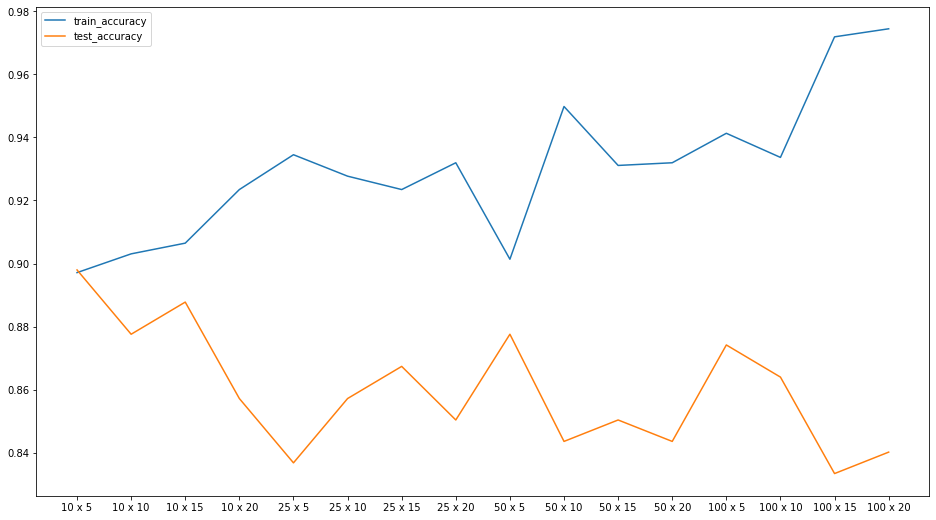

In [40]:
x_ticks = [ i for i in range(1, len(train_acc)+1)]
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x_ticks, train_acc, label='train_accuracy')
plt.plot(x_ticks, test_acc, label='test_accuracy')
plt.xticks(x_ticks, model_dims)
plt.legend()
plt.show()

## 4.1 Performance Classification  Model
* Will illustrate classifier (LR, DT, and Neural Network) for performance with All Features and Top 10 Features - total of 6 models

### 4.1.1 Performance Logistical Regression Model w/ All Feature Set

In [41]:
#Very important to note we dropped PercentSlaryHike from the model, because practically you will never know PercentSalaryHikr
#for a company if you don't know performancerating 

X = df_dummies.drop(["PerformanceRating_4",'PercentSalaryHike',"EmployeeNumber"], axis = 1) #Independent Columns
y = df_dummies['PerformanceRating_4'] #Target Column i.e Performance

# transform the dataset - oversampled data to make sure not imbalanced 
oversampler=SMOTE(random_state=0)
X, y = oversampler.fit_sample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20) #train test split 
print("Train and Test shape:",train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print()

lr = LogisticRegression(solver='lbfgs',max_iter=1000000)
lr.fit(train_x,train_y) #Fits data to Logistical Regression Model
print("The intercept is: ") #Prints model intercept and coefficient
print(lr.intercept_)
print("The coefficients are: ")
print(lr.coef_)
print()

lr_score_train_perf_AllFeat = lr.score(train_x,train_y) #Accuracy of model on train data
lr_predictions_train_perf_AllFeat = lr.predict(train_x) # Predicts model based on train data
lr_confusion_matrix_train_perf_AllFeat = confusion_matrix(train_y,lr_predictions_train_perf_AllFeat) #Confusion Matrix on train data

lr_score_test_perf_AllFeat = lr.score(test_x,test_y) #Accuracy of model on test data
lr_predictions_test_perf_AllFeat = lr.predict(test_x) # Predicts model based on test data
lr_confusion_matrix_test_perf_AllFeat = confusion_matrix(test_y,lr_predictions_test_perf_AllFeat) #Confusion Matrix on test data

print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(lr_score_train_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_train_perf_AllFeat)
print()

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr_score_test_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_test_perf_AllFeat)

Train and Test shape: (1990, 43) (498, 43) (1990,) (498,)

The intercept is: 
[-0.28008248]
The coefficients are: 
[[ 0.31409926 -0.079738    0.27237564 -0.43787258 -0.14834694 -0.06292239
  -0.29936838 -0.43894834 -0.03338232 -0.62503389 -0.22342102 -0.26768306
  -0.21959212  0.0154608  -0.00437029 -0.04880587  0.11251465 -0.95686347
   1.28286982 -0.16667498  0.48028867 -0.15528149  0.12490655  0.04011589
   0.33545486  0.19011581  0.42763786  0.56282243  0.46287665  0.49825102
   0.12019697  0.00556189  0.14430789 -0.11501252  0.89103335 -0.04147295
  -0.08008904  0.11134702 -0.16649724 -0.30213899  0.18450465  0.14659529
   0.05159345]]

Accuracy of logistic regression classifier on train set: 0.584
The corresponding confusion matrix is:
[[594 411]
 [416 569]]

Accuracy of logistic regression classifier on test set: 0.562
The corresponding confusion matrix is:
[[134 105]
 [113 146]]


### 4.1.2 Performance Decision Tree Model w/ All Feature Set

In [42]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y) #Fits data to DT Regression Model

dt_score_train_perf_AllFeat = dt.score(train_x,train_y) #Accurcy of model on train data
dt_predictions_train_perf_AllFeat = dt.predict(train_x) #Predicts model based on train data
dt_confusion_matrix_train_perf_AllFeat = confusion_matrix(train_y,dt_predictions_train_perf_AllFeat) #Confusion Matrix for train data

dt_score_test_perf_AllFeat = dt.score(test_x,test_y) #Accurcy of model on train data
dt_predictions_test_perf_AllFeat = dt.predict(test_x) #Predicts model based on test data
dt_confusion_matrix_test_perf_AllFeat = confusion_matrix(test_y,dt_predictions_test_perf_AllFeat) #Confusion Matrix for test data

print('Accuracy of Decision Tree regression classifier on train set: {:.3f}'.format(dt_score_train_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_train_perf_AllFeat)
print()

print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt_score_test_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_test_perf_AllFeat)

Accuracy of Decision Tree regression classifier on train set: 1.000
The corresponding confusion matrix is:
[[1005    0]
 [   0  985]]

Accuracy of Decision Tree classifier on test set: 0.839
The corresponding confusion matrix is:
[[200  39]
 [ 41 218]]


### 4.1.3 Performance Neural Network Model w/ All Feature Set


In [43]:
# create and fit model
model = create_nn(10, 5, train_x.shape[1], 0.01) 
model.fit(train_x, train_y, verbose=0, epochs=500, batch_size=30) 

# predict train and test
Y_pred_train = model.predict(train_x)
Y_pred_test = model.predict(test_x)

Y_pred_train = Y_pred_train>0.5
Y_pred_test = Y_pred_test>0.5

# accuracy
train_acc_perf_AllFeat = accuracy_score(train_y, Y_pred_train)
test_acc_perf_AllFeat = accuracy_score(test_y, Y_pred_test)

# confusion matrix
cm_train = confusion_matrix(train_y, Y_pred_train)
cm_test = confusion_matrix(test_y, Y_pred_test)

print('Accuracy of neural network on train data : {}'.format(train_acc_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(cm_train)
print('Accuracy of neural network on test data : {}'.format(test_acc_perf_AllFeat))
print('The corresponding confusion matrix is:')
print(cm_test)




Accuracy of neural network on train data : 0.878391959798995
The corresponding confusion matrix is:
[[851 154]
 [ 88 897]]
Accuracy of neural network on test data : 0.8253012048192772
The corresponding confusion matrix is:
[[186  53]
 [ 34 225]]


### 4.1.4 Performance Logistical Regression Model w/ Top Feature Set

In [44]:
# Conducts LR but only with top 10 features as determined by feature importance above 

X = df_dummies[['MonthlyRate','DailyRate','DistanceFromHome','MonthlyIncome','Age','Education','HourlyRate','YearsInCurrentRole','YearsWithCurrManager','TrainingTimesLastYear']]
y = df_dummies['PerformanceRating_4'] #Target Column i.e Performance

# transform the dataset
oversampler=SMOTE(random_state=0)
X, y = oversampler.fit_sample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20) #train test split 
print("Train and Test shape:",train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print()

lr = LogisticRegression(solver='lbfgs',max_iter=1000000)
lr.fit(train_x,train_y) #Fits data to Logistical Regression Model
print("The intercept is: ") #Prints model intercept and coefficient
print(lr.intercept_)
print("The coefficients are: ")
print(lr.coef_)
print()

lr_score_train_perf_TopTen = lr.score(train_x,train_y) #Accuracy of model on train data
lr_predictions_train_perf_TopTen = lr.predict(train_x) # Predicts model based on train data
lr_confusion_matrix_train_perf_TopTen = confusion_matrix(train_y,lr_predictions_train_perf_TopTen) #Confusion Matrix on train data

lr_score_test_perf_TopTen = lr.score(test_x,test_y) #Accuracy of model on test data
lr_predictions_test_perf_TopTen = lr.predict(test_x) # Predicts model based on test data
lr_confusion_matrix_test_perf_TopTen = confusion_matrix(test_y,lr_predictions_test_perf_TopTen) #Confusion Matrix on test data

print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(lr_score_train_perf_TopTen))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_train_perf_TopTen)
print()

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr_score_test_perf_TopTen))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_test_perf_TopTen)

Train and Test shape: (1990, 10) (498, 10) (1990,) (498,)

The intercept is: 
[0.15804002]
The coefficients are: 
[[-0.25349234  0.03986116  0.52748457 -0.51161702  0.1096747  -0.17834163
  -0.15637901  0.61723727  0.12029401 -0.3158672 ]]

Accuracy of logistic regression classifier on train set: 0.552
The corresponding confusion matrix is:
[[584 415]
 [476 515]]

Accuracy of logistic regression classifier on test set: 0.526
The corresponding confusion matrix is:
[[136 109]
 [127 126]]


### 4.1.5 Performance Decision Tree Model w/ Top Feature Set

In [45]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y) #Fits data to DT Regression Model

dt_score_train_perf_TopTen = dt.score(train_x,train_y) #Accurcy of model on train data
dt_predictions_train_perf_TopTen = dt.predict(train_x) #Predicts model based on train data
dt_confusion_matrix_train_perf_TopTen = confusion_matrix(train_y,dt_predictions_train_perf_TopTen) #Confusion Matrix for train data

dt_score_test_perf_TopTen = dt.score(test_x,test_y) #Accurcy of model on train data
dt_predictions_test_perf_TopTen = dt.predict(test_x) #Predicts model based on test data
dt_confusion_matrix_test_perf_TopTen = confusion_matrix(test_y,dt_predictions_test_perf_TopTen) #Confusion Matrix for test data

print('Accuracy of Decision Tree regression classifier on train set: {:.3f}'.format(dt_score_train_perf_TopTen))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_train_perf_TopTen)
print()

print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt_score_test_perf_TopTen))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_test_perf_TopTen)

Accuracy of Decision Tree regression classifier on train set: 1.000
The corresponding confusion matrix is:
[[999   0]
 [  0 991]]

Accuracy of Decision Tree classifier on test set: 0.787
The corresponding confusion matrix is:
[[190  55]
 [ 51 202]]


### 4.1.6 Performance Neural Network Model w/ Top Feature Set

In [46]:
# create and fit model
model = create_nn(10, 5, train_x.shape[1], 0.01) 
model.fit(train_x, train_y, verbose=0, epochs=500, batch_size=30) 

# predict train and test
Y_pred_train = model.predict(train_x)
Y_pred_test = model.predict(test_x)

Y_pred_train = Y_pred_train>0.5
Y_pred_test = Y_pred_test>0.5

# accuracy
train_acc_perf_TopTen = accuracy_score(train_y, Y_pred_train)
test_acc_perf_TopTen = accuracy_score(test_y, Y_pred_test)

# confusion matrix
cm_train = confusion_matrix(train_y, Y_pred_train)
cm_test = confusion_matrix(test_y, Y_pred_test)

print('Accuracy of neural network on train data : {}'.format(train_acc_perf_TopTen))
print('The corresponding confusion matrix is:')
print(cm_train)
print('Accuracy of neural network on test data : {}'.format(test_acc_perf_TopTen))
print('The corresponding confusion matrix is:')
print(cm_test)


Accuracy of neural network on train data : 0.5889447236180905
The corresponding confusion matrix is:
[[459 540]
 [278 713]]
Accuracy of neural network on test data : 0.6024096385542169
The corresponding confusion matrix is:
[[108 137]
 [ 61 192]]


## 4.2 Attrition Classifier Model
* Will illustrate classifier (LR, DT, and Neural Network) for attrition with All Features and Top 10 Features - total of 6 models

### 4.2.1 Attrition Logistic Regression Model w/ All Feature Set

In [47]:
X = df_dummies.drop(["Attrition_Yes","EmployeeNumber"], axis = 1) #Independent Columns
y = df_dummies['Attrition_Yes'] #Target Column i.e Attrition


# transform the dataset
oversampler=SMOTE(random_state=0)
X, y = oversampler.fit_sample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=35) #train test split 
print("Train and Test shape:",train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print()

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(train_x,train_y) #Fits data to Logistical Regression Model
print("The intercept is: ") #Prints model intercept and coefficient
print(lr.intercept_)
print("The coefficients are: ")
print(lr.coef_)
print()

lr_score_train_att_AllFeat = lr.score(train_x,train_y) #Accuracy of model on train data
lr_predictions_train_att_AllFeat = lr.predict(train_x) # Predicts model based on train data
lr_confusion_matrix_train_att_AllFeat = confusion_matrix(train_y,lr_predictions_train_att_AllFeat) #Confusion Matrix for train

lr_score_test_att_AllFeat = lr.score(test_x,test_y) #Accuracy of model on test data
lr_predictions_test_att_AllFeat = lr.predict(test_x) # Predicts model based on test data
lr_confusion_matrix_test_att_AllFeat = confusion_matrix(test_y,lr_predictions_test_att_AllFeat) #Confusion Matrix for test

print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(lr_score_train_att_AllFeat))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_train_att_AllFeat)
print()

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr_score_test_att_AllFeat))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_test_att_AllFeat)

Train and Test shape: (1972, 44) (494, 44) (1972,) (494,)

The intercept is: 
[1.08552403]
The coefficients are: 
[[-1.34254168 -0.38080069  0.79260544  0.16313753 -1.21086241  0.09083791
  -1.41194339  0.0195537  -1.08636913  0.02800202  0.07371663  1.32079591
  -1.27321444 -0.64619432 -0.60772336 -1.77957873 -1.26957599 -1.15280573
   1.52877074 -1.68075298  2.00657144 -1.35699677  1.57251604  1.02835345
   0.00348931  0.44989061 -0.44029236 -0.06573815 -0.3238299  -0.81366119
   0.43978972  0.40803471  0.75249698  1.443362   -0.22302539  0.30175667
  -1.0001012   0.39637001  0.35998669  1.30518734  0.76078276  1.34631537
   1.9092999   0.23361574]]

Accuracy of logistic regression classifier on train set: 0.807
The corresponding confusion matrix is:
[[772 213]
 [168 819]]

Accuracy of logistic regression classifier on test set: 0.800
The corresponding confusion matrix is:
[[186  62]
 [ 37 209]]


### 4.2.2 Attrition Decision Tree Model w/All Feature Set

In [48]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y) #Fits data to DT Regression Model

dt_score_train_att_AllFeat = dt.score(train_x,train_y) #Accuracy of model on train data
dt_predictions_train_att_AllFeat = dt.predict(train_x) # Predicts model based on train data
dt_confusion_matrix_train_att_AllFeat = confusion_matrix(train_y,dt_predictions_train_att_AllFeat) #Confusion Matrix for train

dt_score_test_att_AllFeat = dt.score(test_x,test_y) #Accuracy of model on test data
dt_predictions_test_att_AllFeat = dt.predict(test_x) # Predicts model based on train data
dt_confusion_matrix_test_att_AllFeat = confusion_matrix(test_y,dt_predictions_test_att_AllFeat) #Confusion Matrix for test

print('Accuracy of Decision Tree regression classifier on train set: {:.3f}'.format(dt_score_train_att_AllFeat))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_train_att_AllFeat)
print()

print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt_score_test_att_AllFeat))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_test_att_AllFeat)

Accuracy of Decision Tree regression classifier on train set: 1.000
The corresponding confusion matrix is:
[[985   0]
 [  0 987]]

Accuracy of Decision Tree classifier on test set: 0.832
The corresponding confusion matrix is:
[[191  57]
 [ 26 220]]


### 4.2.3 Attrition Neural Network Model w/all Feature Set

In [49]:
# create and fit model
model = create_nn(10, 5, train_x.shape[1], 0.01) 
model.fit(train_x, train_y, verbose=0, epochs=500, batch_size=30) 

# predict train and test
Y_pred_train = model.predict(train_x)
Y_pred_test = model.predict(test_x)

Y_pred_train = Y_pred_train>0.5
Y_pred_test = Y_pred_test>0.5

# accuracy
train_acc_att_AllFeat = accuracy_score(train_y, Y_pred_train)
test_acc_att_AllFeat = accuracy_score(test_y, Y_pred_test)

# confusion matrix
cm_train = confusion_matrix(train_y, Y_pred_train)
cm_test = confusion_matrix(test_y, Y_pred_test)

print('Accuracy of neural network on train data : {}'.format(train_acc_att_AllFeat))
print('The corresponding confusion matrix is:')
print(cm_train)
print('Accuracy of neural network on test data : {}'.format(test_acc_att_AllFeat))
print('The corresponding confusion matrix is:')
print(cm_test)


Accuracy of neural network on train data : 0.9345841784989858
The corresponding confusion matrix is:
[[934  51]
 [ 78 909]]
Accuracy of neural network on test data : 0.8643724696356275
The corresponding confusion matrix is:
[[206  42]
 [ 25 221]]


### 4.2.4 Attrition Logistic Regression Model w/ Top 10 Feature Set


In [50]:
X = df_dummies[['OverTime_Yes','Age','MonthlyIncome','TotalWorkingYears','DistanceFromHome','EnvironmentSatisfaction','WorkLifeBalance','JobSatisfaction','YearsWithCurrManager','YearsAtCompany']]
y = df_dummies['Attrition_Yes'] #Target Column i.e Attrition

# transform the dataset
oversampler=SMOTE(random_state=0)
X, y = oversampler.fit_sample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=35) #train test split 
print("Train and Test shape:",train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print()

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(train_x,train_y) #Fits data to Logistical Regression Model
print("The intercept is: ") #Prints model intercept and coefficient
print(lr.intercept_)
print("The coefficients are: ")
print(lr.coef_)
print()

lr_score_train_att_TopTen = lr.score(train_x,train_y) #Accuracy of model on train data
lr_predictions_train_att_TopTen = lr.predict(train_x) # Predicts model based on train data
lr_confusion_matrix_train_att_TopTen = confusion_matrix(train_y,lr_predictions_train_att_TopTen) #Confusion Matrix for train

lr_score_test_att_TopTen = lr.score(test_x,test_y) #Accuracy of model on test data
lr_predictions_test_att_TopTen = lr.predict(test_x) # Predicts model based on test data
lr_confusion_matrix_test_att_TopTen = confusion_matrix(test_y,lr_predictions_test_att_TopTen) #Confusion Matrix for test

print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(lr_score_train_att_TopTen))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_train_att_TopTen)
print()

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr_score_test_att_TopTen))
print('The corresponding confusion matrix is:')
print(lr_confusion_matrix_test_att_TopTen)

Train and Test shape: (1972, 10) (494, 10) (1972,) (494,)

The intercept is: 
[2.41047758]
The coefficients are: 
[[ 1.51592491 -1.50510055 -1.20139856 -0.90809779  0.33409353 -1.13620157
  -0.94435984 -1.12225302 -2.02581112  1.31098403]]

Accuracy of logistic regression classifier on train set: 0.741
The corresponding confusion matrix is:
[[728 257]
 [253 734]]

Accuracy of logistic regression classifier on test set: 0.717
The corresponding confusion matrix is:
[[169  79]
 [ 61 185]]


### 4.2.5 Attrition Decision Regression Model w/ Top 10 Feature Set


In [51]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y) #Fits data to DT Regression Model

dt_score_train_att_TopTen = dt.score(train_x,train_y) #Accuracy of model on train data
dt_predictions_train_att_TopTen = dt.predict(train_x) # Predicts model based on train data
dt_confusion_matrix_train_att_TopTen = confusion_matrix(train_y,dt_predictions_train_att_TopTen) #Confusion Matrix for train

dt_score_test_att_TopTen = dt.score(test_x,test_y) #Accuracy of model on test data
dt_predictions_test_att_TopTen = dt.predict(test_x) # Predicts model based on train data
dt_confusion_matrix_test_att_TopTen = confusion_matrix(test_y,dt_predictions_test_att_TopTen) #Confusion Matrix for test

print('Accuracy of Decision Tree regression classifier on train set: {:.3f}'.format(dt_score_train_att_TopTen))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_train_att_TopTen)
print()

print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(dt_score_test_att_TopTen))
print('The corresponding confusion matrix is:')
print(dt_confusion_matrix_test_att_TopTen)

Accuracy of Decision Tree regression classifier on train set: 1.000
The corresponding confusion matrix is:
[[985   0]
 [  0 987]]

Accuracy of Decision Tree classifier on test set: 0.838
The corresponding confusion matrix is:
[[205  43]
 [ 37 209]]


### 4.2.6 Attrition Neural Network Model w/ Top 10 Feature Set


In [52]:
# create and fit model
model = create_nn(10, 5, train_x.shape[1], 0.01) 
model.fit(train_x, train_y, verbose=0, epochs=500, batch_size=30) 

# predict train and test
Y_pred_train = model.predict(train_x)
Y_pred_test = model.predict(test_x)

Y_pred_train = Y_pred_train>0.5
Y_pred_test = Y_pred_test>0.5

# accuracy
train_acc_att_TopTen = accuracy_score(train_y, Y_pred_train)
test_acc_att_TopTen = accuracy_score(test_y, Y_pred_test)

# confusion matrix
cm_train = confusion_matrix(train_y, Y_pred_train)
cm_test = confusion_matrix(test_y, Y_pred_test)

print('Accuracy of neural network on train data : {}'.format(train_acc_att_TopTen))
print('The corresponding confusion matrix is:')
print(cm_train)
print('Accuracy of neural network on test data : {}'.format(test_acc_att_TopTen))
print('The corresponding confusion matrix is:')
print(cm_test)


Accuracy of neural network on train data : 0.75
The corresponding confusion matrix is:
[[783 202]
 [291 696]]
Accuracy of neural network on test data : 0.7327935222672065
The corresponding confusion matrix is:
[[183  65]
 [ 67 179]]


# 5.0 Classifier Comparison 

* In this section we will look at all the classifiers for both performance and attrition 
* We will compare the classifiers to see which one proivides the most accurate results 

# 5.1 Performance Classifier Comparison
* Compare all the performance classifier accuracy in a table and visualize it 

In [53]:
Performance_Accuracy = {'FeatureSet': ['LogisticRegressionAccuracy','DecisionTreeAccuracy','NeuralNetworkAccuracy'],
                       'AllFeatures': [lr_score_test_perf_AllFeat,dt_score_test_perf_AllFeat,test_acc_perf_AllFeat],
                       'TopTenFeatures': [lr_score_test_perf_TopTen,dt_score_test_perf_TopTen,test_acc_perf_TopTen]}

Performance_Accuracy = pd.DataFrame (Performance_Accuracy, columns = ['FeatureSet','AllFeatures','TopTenFeatures'])
Performance_Accuracy

,FeatureSet,AllFeatures,TopTenFeatures
0,LogisticRegressionAccuracy,0.562249,0.526104
1,DecisionTreeAccuracy,0.839357,0.787149
2,NeuralNetworkAccuracy,0.825301,0.602410


* Visualize Peformance Accuracy Comparison in Barplot 

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Neural Network')]

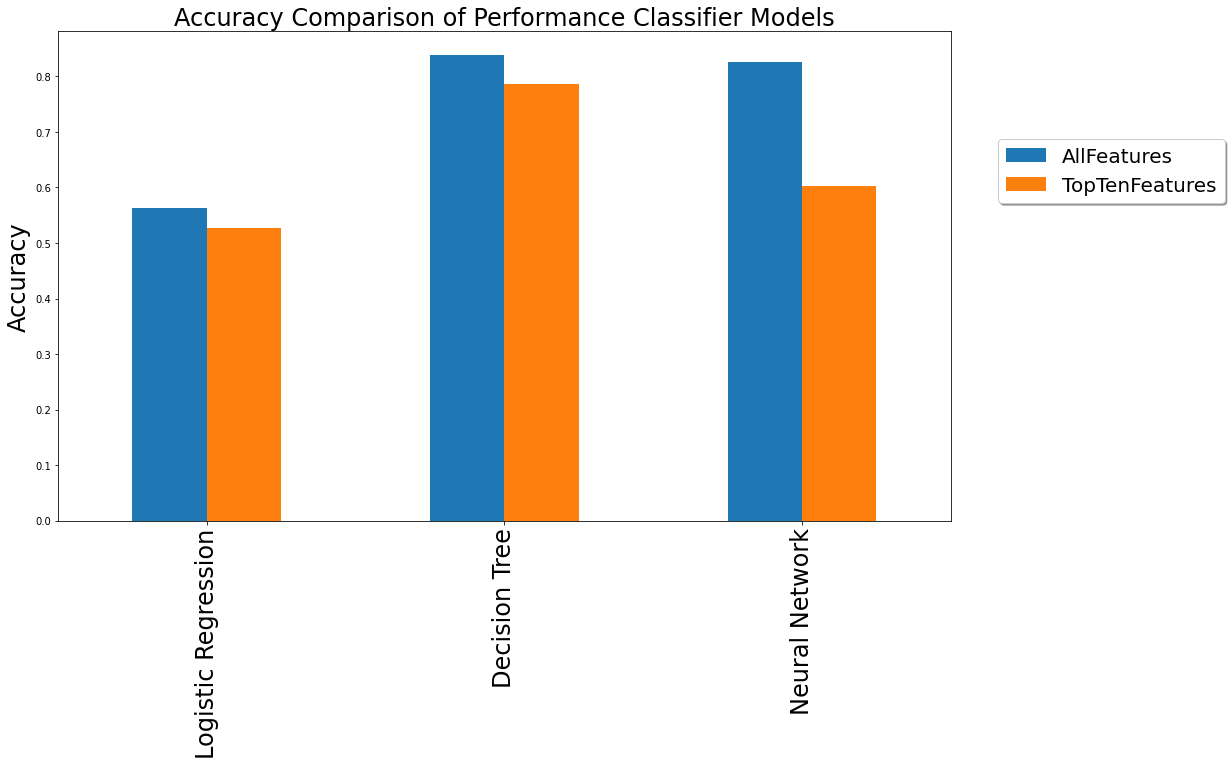

In [60]:
ax = Performance_Accuracy.plot(x="FeatureSet", y=["AllFeatures", "TopTenFeatures"], kind="bar")
ax.set_xlabel('')
ax.set_ylabel('Accuracy',fontsize=24)
ax.set_title('Accuracy Comparison of Performance Classifier Models',fontsize=24)
ax.legend(loc='upper center', bbox_to_anchor=(1.18, 0.8), fontsize=20,shadow=True, ncol=1)
ax.set_xticklabels(['Logistic Regression', 'Decision Tree', 'Neural Network'], fontsize=24)


# 5.2 Attrition Classifier Comparison

* Compare all the attrition classifier accuracy in a table and visualize it 

In [55]:
Attrition_Accuracy = {'FeatureSet': ['LogisticRegressionAccuracy','DecisionTreeAccuracy','NeuralNetworkAccuracy'],
                       'AllFeatures': [lr_score_test_att_AllFeat,dt_score_test_att_AllFeat,test_acc_att_AllFeat],
                       'TopTenFeatures': [lr_score_test_att_TopTen,dt_score_test_att_TopTen,test_acc_att_TopTen]}

Attrition_Accuracy = pd.DataFrame (Attrition_Accuracy, columns = ['FeatureSet','AllFeatures','TopTenFeatures'])
Attrition_Accuracy

,FeatureSet,AllFeatures,TopTenFeatures
0,LogisticRegressionAccuracy,0.799595,0.716599
1,DecisionTreeAccuracy,0.831984,0.838057
2,NeuralNetworkAccuracy,0.864372,0.732794


* Visualize Attrition Accuracy Comparison in Barplot 

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Neural Network')]

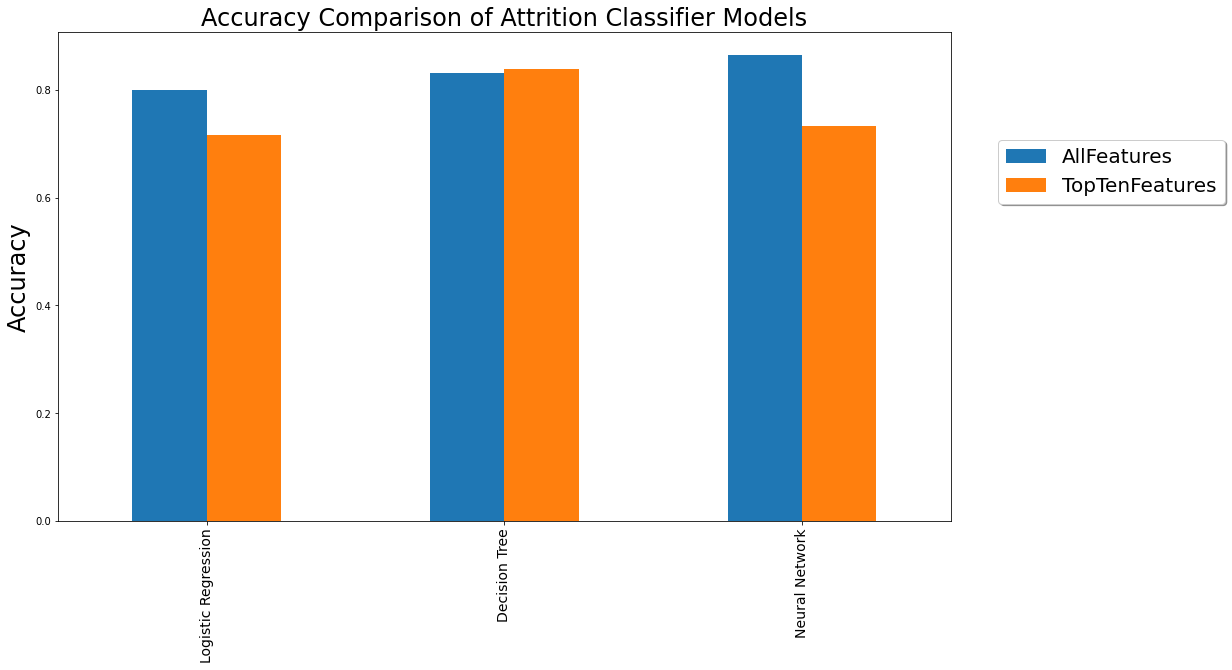

In [61]:
ax = Attrition_Accuracy.plot(x="FeatureSet", y=["AllFeatures", "TopTenFeatures"], kind="bar")

ax.set_xlabel('')
ax.set_ylabel('Accuracy',fontsize=24)
ax.set_title('Accuracy Comparison of Attrition Classifier Models',fontsize=24)
ax.legend(loc='upper center', bbox_to_anchor=(1.18, 0.8), fontsize=20,shadow=True, ncol=1)
ax.set_xticklabels(['Logistic Regression', 'Decision Tree', 'Neural Network'], fontsize=14)